# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [4]:
image = plt.imread('data/ejer_kmeans.png')
image.shape

(764, 1499, 3)

In [7]:
image.size/3

1145236.0

In [6]:
764*1499

1145236

In [8]:
image

array([[[0.5686275 , 0.5803922 , 0.61960787],
        [0.5529412 , 0.5647059 , 0.6039216 ],
        [0.54901963, 0.5686275 , 0.6039216 ],
        ...,
        [0.7529412 , 0.7882353 , 0.827451  ],
        [0.74509805, 0.78039217, 0.8235294 ],
        [0.1254902 , 0.12941177, 0.14117648]],

       [[0.5647059 , 0.5764706 , 0.6156863 ],
        [0.54901963, 0.5647059 , 0.6       ],
        [0.54901963, 0.5686275 , 0.6039216 ],
        ...,
        [0.7529412 , 0.7882353 , 0.83137256],
        [0.7490196 , 0.78431374, 0.8235294 ],
        [0.1254902 , 0.12941177, 0.14117648]],

       [[0.5647059 , 0.5764706 , 0.6156863 ],
        [0.54901963, 0.5647059 , 0.6       ],
        [0.54901963, 0.5686275 , 0.6039216 ],
        ...,
        [0.7529412 , 0.7921569 , 0.8352941 ],
        [0.7529412 , 0.7921569 , 0.83137256],
        [0.1254902 , 0.12941177, 0.14117648]],

       ...,

       [[0.26666668, 0.28627452, 0.29411766],
        [0.26666668, 0.28627452, 0.29803923],
        [0.26666668, 0

Muestra la imagen para ver que se ha cargado bien

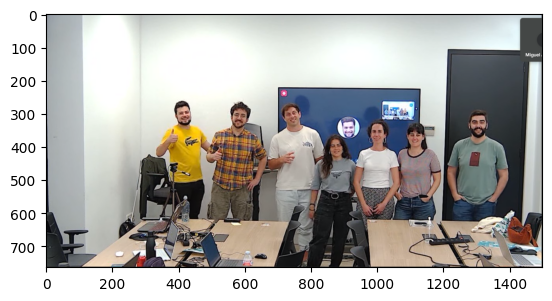

In [10]:
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [11]:
X = image.reshape(-1,3)
X.shape

(1145236, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [12]:
k = 10
kmeans = KMeans(n_clusters=k, n_init=10, random_state=10).fit(X)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [13]:
kmeans.labels_

array([2, 5, 5, ..., 3, 3, 3])

In [14]:
kmeans.cluster_centers_

array([[0.4699363 , 0.329824  , 0.2620084 ],
       [0.870413  , 0.88864714, 0.866539  ],
       [0.70704556, 0.66817063, 0.62639904],
       [0.09669226, 0.09022897, 0.09784871],
       [0.27314585, 0.3460226 , 0.4537812 ],
       [0.5415034 , 0.49792886, 0.47579893],
       [0.76178825, 0.7667312 , 0.75285184],
       [0.9686135 , 0.9845308 , 0.96934676],
       [0.79660475, 0.6124987 , 0.10113126],
       [0.23524728, 0.23632446, 0.24908075]], dtype=float32)

In [16]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [17]:
segmented_img = segmented_img.reshape(image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

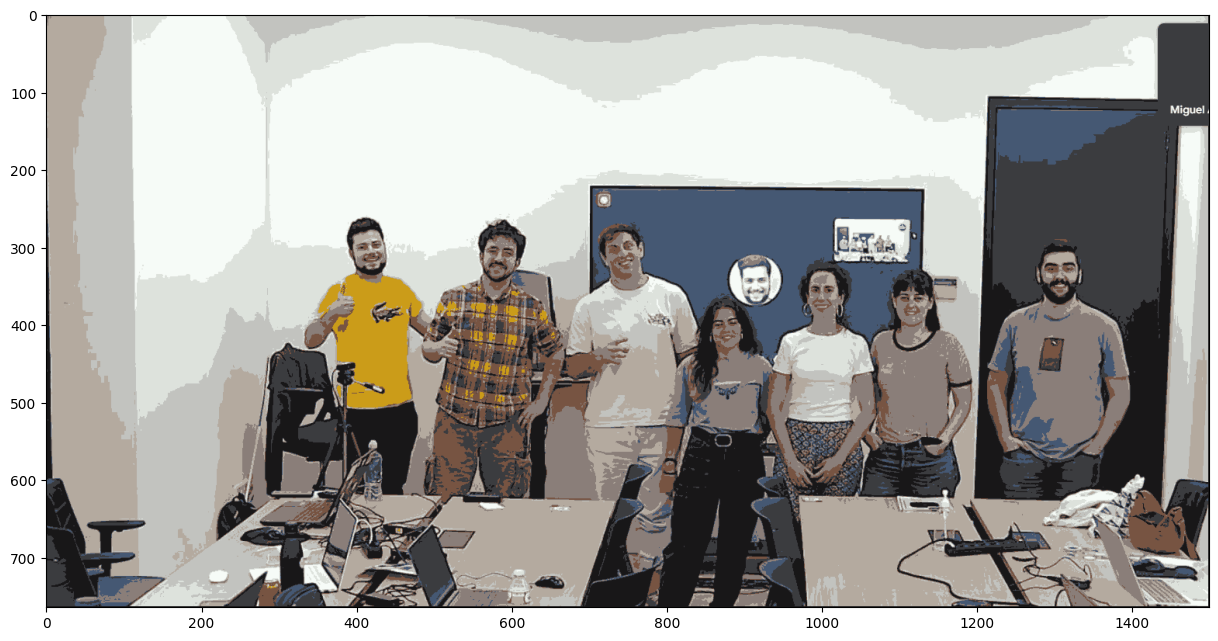

In [19]:
fig = plt.figure(figsize=(15,15))
plt.imshow(segmented_img)

In [20]:
fig.savefig("data/kmeans_1_output.png")

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [24]:
def cluster_colors(image, n_colores, save=False):
    image = plt.imread(image)
    X = image.reshape(-1,3)
    kmeans = KMeans(n_clusters=n_colores).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    fig = plt.figure(figsize=(15,15))
    plt.imshow(segmented_img.reshape(image.shape))

    if save:
        fig.savefig("mi_imagen.png")

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


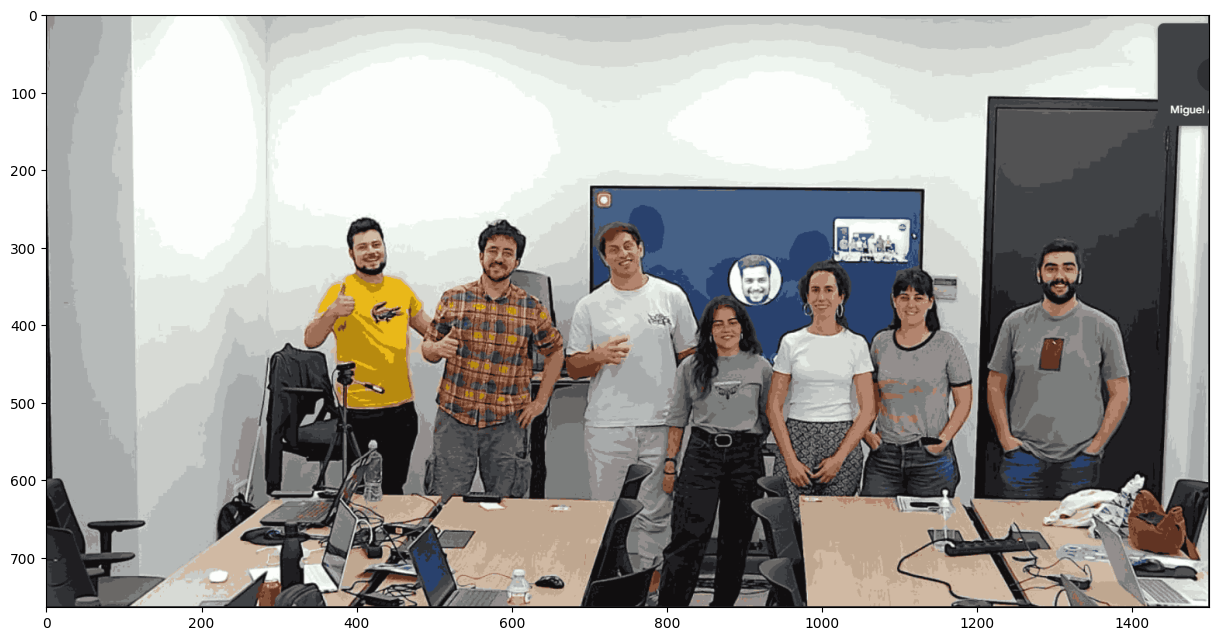

In [27]:
cluster_colors('data/ejer_kmeans.png', 25)